In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd 
import os 

In [2]:
train_path = r"D:\New_folder\train"
test_path = r"D:\New_folder\test"
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
    

In [3]:
img_height, img_width = 224,224
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path ,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    test_path ,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 23307 images belonging to 5 classes.
Found 5834 images belonging to 5 classes.


In [4]:
label_names = list(train_generator.class_indices.keys())
print( label_names)

['angry', 'fear', 'happy', 'sad', 'surprise']


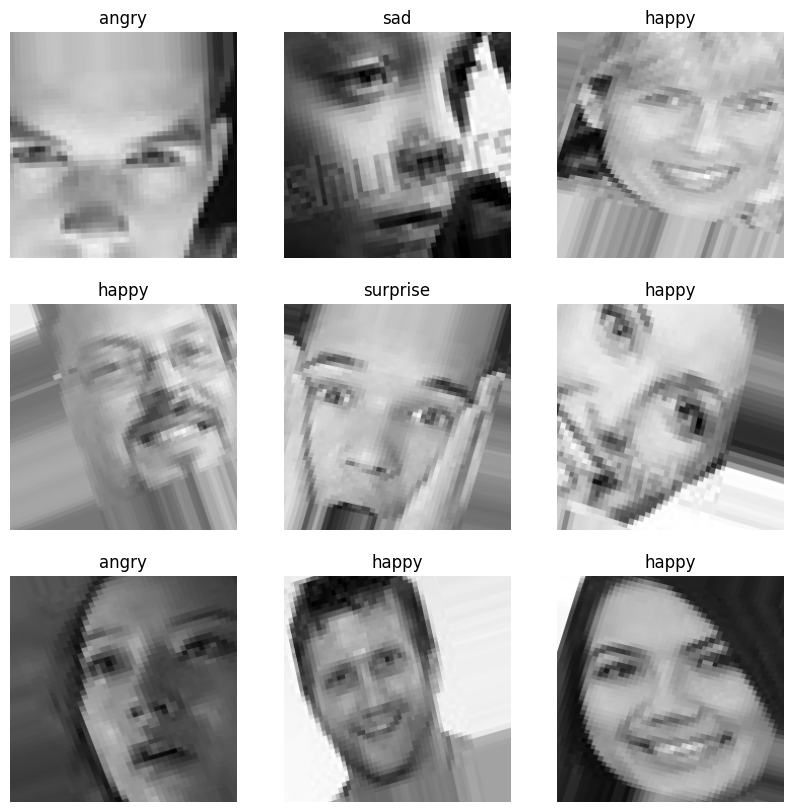

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
images , labels = next(train_generator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].squeeze())
    class_index = np.argmax(labels[i])
    plt.title(label_names[class_index])
    plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras import models,layers
import warnings
warnings.filterwarnings('ignore')

In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu',),
    layers.Dropout(0.4), 
    layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265,861 (73.49 MB)

 Trainable params: 19,265,861 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       
    patience=3,               
    restore_best_weights=True 
)

In [20]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=[early_stopping])

Epoch 1/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 2350s 3s/step - accuracy: 0.3169 - loss: 1.5642 - val_accuracy: 0.3120 - val_loss: 1.5316
Epoch 2/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1544s 2s/step - accuracy: 0.3309 - loss: 1.5218 - val_accuracy: 0.3601 - val_loss: 1.4758
Epoch 3/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1535s 2s/step - accuracy: 0.3756 - loss: 1.4633 - val_accuracy: 0.4056 - val_loss: 1.4129
Epoch 4/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1546s 2s/step - accuracy: 0.4037 - loss: 1.3999 - val_accuracy: 0.4321 - val_loss: 1.3502
Epoch 5/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1537s 2s/step - accuracy: 0.4395 - loss: 1.3413 - val_accuracy: 0.4679 - val_loss: 1.2894
Epoch 6/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1548s 2s/step - accuracy: 0.4663 - loss: 1.2950 - val_accuracy: 0.4745 - val_loss: 1.2552
Epoch 7/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1561s 2s/step - accuracy: 0.4887 - loss: 1.2524 - val_accuracy: 0.4993 - val_loss: 1.2177
Epoch 8/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1524s 2s/step - accuracy: 0.5033 - loss: 1.2129 - 

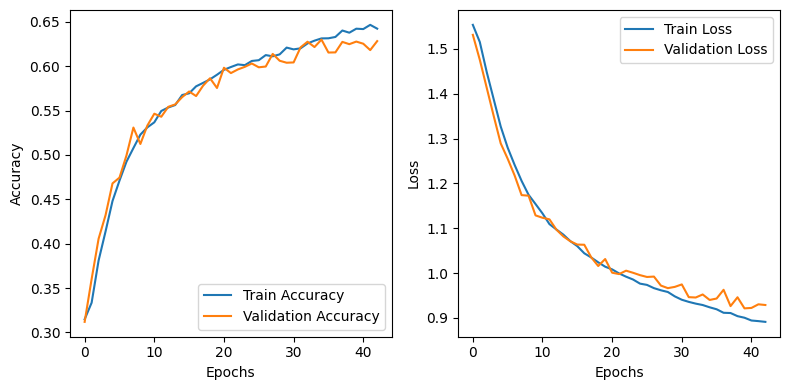

In [22]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [27]:
import tensorflow as tf
image =

image = tf.keras.utils.load_img(image,target_size=(224,224))
image_array = tf.keras.utils.array_to_img(image)
image_batch = tf.expand_dims(image_array,axis=0)

In [28]:
prediction = model.predict(image_batch)
score = tf.nn.softmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [29]:
print('image is with {} accuracy of {:0.2f} '.format(label_names[np.argmax(score)],np.max(score)*100))

image is with happy accuracy of 40.46 
